### Project - MovieLens Data Analysis

The GroupLens Research Project is a research group in the Department of Computer Science and Engineering at the University of Minnesota. The data is widely used for collaborative filtering and other filtering solutions. However, we will be using this data to act as a means to demonstrate our skill in using Python to “play” with data.

#### Domain 
Internet and Entertainment

**Note that the project will need you to apply the concepts of groupby and merging extensively.**

In [1]:
'''This is MovieLens Data Analysis project primarily using Python Numpy, Pandas and Seaborn packages'''

'This is MovieLens Data Analysis project primarily using Python Numpy, Pandas and Seaborn packages'

#### 1. Import the necessary packages - 2.5 marks

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline
sns.set_style(style='darkgrid') # setting background for graphs to have a better view

#### 2. Read the 3 datasets into dataframes - 2.5 marks

In [3]:
# Read Movie data
movielens_itemdata = pd.read_csv("item.csv")

# Read User Ratings data
movielens_ratingsdata = pd.read_csv("Data.csv")

# Read User data
movielens_userdata = pd.read_csv("user.csv")

#### 3. Apply info, shape, describe, and find the number of missing values in the data - 5 marks

In [4]:
# Info, shape, describe and missing values details in Movie data (item.csv)
movielens_itemdata.info()
np.shape(movielens_itemdata)
movielens_itemdata.describe()
missingvalues_itemdata = movielens_itemdata.isnull().sum()
print("Number of missing values in Movie data: \n" ,missingvalues_itemdata)

# Info, shape, describe and missing values details in rating data (data.csv)
movielens_ratingsdata.info()
np.shape(movielens_ratingsdata)
movielens_ratingsdata.describe()
missingvalues_data = movielens_ratingsdata.isnull().sum()
print("Number of missing values in User Ratings data:\n" ,missingvalues_data)

# Info, shape, describe and missing values details in user data (user.csv)
movielens_userdata.info()
np.shape(movielens_userdata)
movielens_userdata.describe()
missingvalues_userdata = movielens_userdata.isnull().sum()
print("Number of missing values in User data:\n", missingvalues_userdata)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1681 entries, 0 to 1680
Data columns (total 22 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   movie id      1681 non-null   int64 
 1   movie title   1681 non-null   object
 2   release date  1681 non-null   object
 3   unknown       1681 non-null   int64 
 4   Action        1681 non-null   int64 
 5   Adventure     1681 non-null   int64 
 6   Animation     1681 non-null   int64 
 7   Childrens     1681 non-null   int64 
 8   Comedy        1681 non-null   int64 
 9   Crime         1681 non-null   int64 
 10  Documentary   1681 non-null   int64 
 11  Drama         1681 non-null   int64 
 12  Fantasy       1681 non-null   int64 
 13  Film-Noir     1681 non-null   int64 
 14  Horror        1681 non-null   int64 
 15  Musical       1681 non-null   int64 
 16  Mystery       1681 non-null   int64 
 17  Romance       1681 non-null   int64 
 18  Sci-Fi        1681 non-null   int64 
 19  Thrill

#### 4. Find the number of movies per genre using the item data - 5 marks

In [5]:
# First 3 columns ('movie id', 'movie title' & 'release date') in item sheet are not genre so they have been excluded using loc 
number_movies = movielens_itemdata.loc[:,'unknown':'Western'].sum()
print("Number of movies per genre:\n",number_movies)

Number of movies per genre:
 unknown          1
Action         251
Adventure      135
Animation       42
Childrens      122
Comedy         505
Crime          109
Documentary     50
Drama          725
Fantasy         22
Film-Noir       24
Horror          92
Musical         56
Mystery         61
Romance        247
Sci-Fi         101
Thriller       251
War             71
Western         27
dtype: int64


#### 5. Find the movies that have more than one genre - 2.5 marks

In [6]:
# Excluded 'movie id' column by dropping from dataframe which is not required while summing up the rows 
movielens_drop = movielens_itemdata.drop(['movie id'], axis =1)
movielens_drop['sum_row'] = movielens_drop.sum( axis=1 )
movielens_drop[movielens_drop.sum_row >1]

,movie title,release date,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,...,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,sum_row
0,Toy Story,01-Jan-1995,0,0,0,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,3
1,GoldenEye,01-Jan-1995,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,3
3,Get Shorty,01-Jan-1995,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,3
4,Copycat,01-Jan-1995,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,3
6,Twelve Monkeys,01-Jan-1995,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1667,MURDER and murder,20-Jun-1997,0,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,3
1668,Tainted,01-Feb-1998,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,2
1671,Mirage,01-Jan-1995,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,2
1677,B. Monkey,06-Feb-1998,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,2


#### 6. Drop the movie where the genre is unknown - 2.5 marks

In [7]:
# dropped the movie with unkown genre and printed the len before and after 
len1 = len(movielens_itemdata)
print("Length before dropping", len1)
movielens_itemdata = movielens_itemdata.drop(movielens_itemdata[movielens_itemdata.unknown == 1].index)
print("Length after dropping", len(movielens_itemdata))

Length before dropping 1681
Length after dropping 1680


### 7. Univariate plots of columns: 'rating', 'Age', 'release year', 'Gender' and 'Occupation' - 10 marks

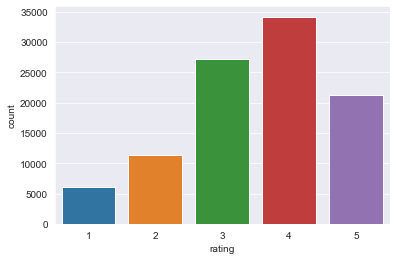

In [8]:
# Univariate plot of columns 'ratings' from user rating data file
sns.countplot(movielens_ratingsdata['rating'])

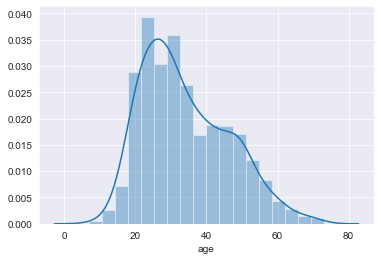

In [9]:
# Univariate plot of columns 'age' from user data file
sns.distplot(movielens_userdata['age'])

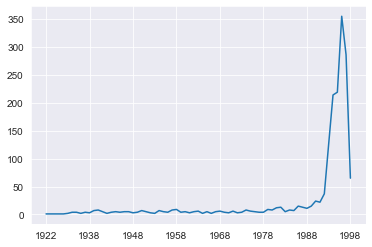

In [10]:
# plot of based on release year from item data file
movielens_itemdata['release date'].str.slice(7,11).value_counts().sort_index().plot()

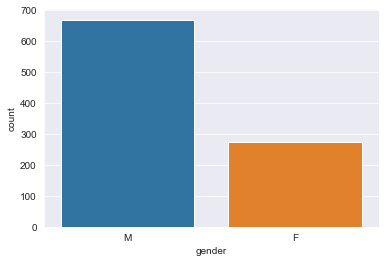

In [11]:
# Univariate plot of columns 'gender' from user data file
sns.countplot(movielens_userdata['gender'])

[Text(0, 0, 'technician'),
 Text(0, 0, 'other'),
 Text(0, 0, 'writer'),
 Text(0, 0, 'executive'),
 Text(0, 0, 'administrator'),
 Text(0, 0, 'student'),
 Text(0, 0, 'lawyer'),
 Text(0, 0, 'educator'),
 Text(0, 0, 'scientist'),
 Text(0, 0, 'entertainment'),
 Text(0, 0, 'programmer'),
 Text(0, 0, 'librarian'),
 Text(0, 0, 'homemaker'),
 Text(0, 0, 'artist'),
 Text(0, 0, 'engineer'),
 Text(0, 0, 'marketing'),
 Text(0, 0, 'none'),
 Text(0, 0, 'healthcare'),
 Text(0, 0, 'retired'),
 Text(0, 0, 'salesman'),
 Text(0, 0, 'doctor')]

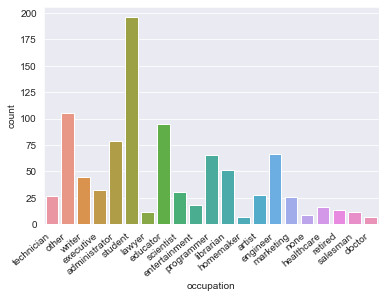

In [28]:
# Univariate plot of columns 'occupation' from user data file
occupation = sns.countplot(movielens_userdata['occupation'])
occupation.set_xticklabels(occupation.get_xticklabels(), rotation=40, ha="right")

### 8. Visualize how popularity of genres has changed over the years - 10 marks

Note that you need to use the number of releases in a year as a parameter of popularity of a genre

Hint 

1: you need to reach to a data frame where the release year is the index and the genre is the column names (one cell shows the number of release in a year in one genre) or vice versa.
Once that is achieved, you can either use univariate plots or can use the heatmap to visualise all the changes over the years 
in one go. 

Hint 2: Use groupby on the relevant column and use sum() on the same to find out the nuumber of releases in a year/genre.  

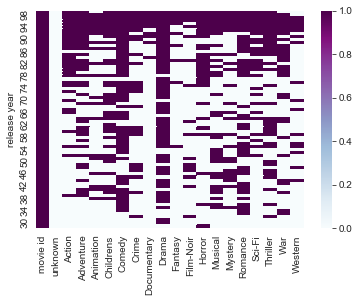

In [13]:
movielens_itemdata['release year'] = movielens_itemdata['release date'].str[-2:]
sum1 = movielens_itemdata.groupby('release year').sum().sort_values('release year', ascending=False)
sns.heatmap(sum1, vmin=0, vmax=1, cmap='BuPu')

### 9. Find the top 25 movies according to average ratings such that each movie has number of ratings more than 100 - 10 marks

Hint : 
1. First find the movies that have more than 100 ratings(use merge, groupby and count). Extract the movie titles in a list.
2. Find the average rating of all the movies and sort them in the descending order. You will have to use the .merge() function to reach to a data set through which you can get the names and the average rating.
3. Use isin(list obtained from 1) to filter out the movies which have more than 100 ratings.

Note: This question will need you to research about groupby and apply your findings. You can find more on groupby on https://realpython.com/pandas-groupby/.

In [14]:
movielens_ratings = pd.merge(movielens_itemdata, movielens_ratingsdata)
movielens_ratings.groupby('movie title').count()
movielens_lens = pd.merge(movielens_ratings, movielens_userdata)
most_rated = movielens_lens.groupby('movie title').size().sort_values(ascending=False)[:25]
print("Top 25 movies with number of ratings more than 100", most_rated)

Top 25 movies with number of ratings more than 100 movie title
Star Wars                              583
Contact                                509
Fargo                                  508
Return of the Jedi                     507
Liar Liar                              485
English Patient, The                   481
Scream                                 478
Toy Story                              452
Air Force One                          431
Independence Day (ID4)                 429
Raiders of the Lost Ark                420
Godfather, The                         413
Pulp Fiction                           394
Twelve Monkeys                         392
Silence of the Lambs, The              390
Jerry Maguire                          384
Chasing Amy                            379
Rock, The                              378
Empire Strikes Back, The               367
Star Trek: First Contact               365
Titanic                                350
Back to the Future                

### 10. See gender distribution across different genres check for the validity of the below statements - 10 marks

* Men watch more drama than women
* Women watch more Sci-Fi than men
* Men watch more Romance than women


1. There is no need to conduct statistical tests around this. Just compare the percentages and comment on the validity of the above statements.

2. you might want ot use the .sum(), .div() function here.
3. Use number of ratings to validate the numbers. For example, if out of 4000 ratings received by women, 3000 are for drama, we will assume that 75% of the women watch drama.

#### Conclusion:



In [15]:
movielens_ratings = pd.merge(movielens_itemdata, movielens_ratingsdata)
movielens_lens = pd.merge(movielens_ratings, movielens_userdata)

gender_ratings_drama1 = movielens_lens.pivot_table('Drama', index ='gender')
print(gender_ratings_drama1,"\n")

gender_ratings_SciFi = movielens_lens.pivot_table('Sci-Fi', index ='gender')
print(gender_ratings_SciFi,"\n")

gender_ratings_Romance = movielens_lens.pivot_table('Romance', index ='gender')
print(gender_ratings_Romance)

           Drama
gender          
F       0.427694
M       0.389040 

          Sci-Fi
gender          
F       0.102145
M       0.136037 

         Romance
gender          
F       0.227601
M       0.183200


In [16]:
'''
Based on above analysis

a. We can see 'Men watch more drama than women' is false. It's other way around that more Women watch Drama movie than Men 

b. We can see 'Women watch more Sci-Fi than men' is false. It's other way around that more Men watch Sci-Fi movie than Women

c. We can see 'Men watch more Romance than women' is fale. It's other way around that more Women watch Romance movie than Women 

'''

"\nBased on above analysis\n\na. We can see 'Men watch more drama than women' is false. It's other way around that more Women watch Drama movie than Men \n\nb. We can see 'Women watch more Sci-Fi than men' is false. It's other way around that more Men watch Sci-Fi movie than Women\n\nc. We can see 'Men watch more Romance than women' is fale. It's other way around that more Women watch Romance movie than Women \n\n"